# 01. Importing libraries & data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Define path
path = r'C:\Users\astat\Documents\Final project'

In [3]:
#Import data
crime_police = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'crime_police_cleaned.pkl'))

In [4]:
crime_police.shape

(18362528, 21)

In [5]:
crime_police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18362528 entries, 0 to 7893406
Data columns (total 21 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Staff_area_name           object 
 1   crime_area                int8   
 2   Geo_boundries_Data_match  object 
 3   number_residents          float32
 4   number_police             float16
 5   year                      int16  
 6   police_per_1000           float16
 7   number_spc                float16
 8   id                        int32  
 9   date                      object 
 10  reported                  int8   
 11  Longitude                 float32
 12  Latitude                  float32
 13  lsoa_code                 object 
 14  lsoa_name                 object 
 15  crime_type                int8   
 16  outcome_cat               float16
 17  month                     int8   
 18  number_crimes             int64  
 19  crime_per_officer         float64
 20  crime_per_residents    

In [6]:
crime_police['number_crimes'] = crime_police['number_crimes'].astype('int32')
crime_police['crime_per_officer'] = crime_police['crime_per_officer'].astype('float32')

# 02. Correlation matrix

In [7]:
crime_police.columns

Index(['Staff_area_name', 'crime_area', 'Geo_boundries_Data_match',
       'number_residents', 'number_police', 'year', 'police_per_1000',
       'number_spc', 'id', 'date', 'reported', 'Longitude', 'Latitude',
       'lsoa_code', 'lsoa_name', 'crime_type', 'outcome_cat', 'month',
       'number_crimes', 'crime_per_officer', 'crime_per_residents'],
      dtype='object')

In [8]:
#Creating a subset excluding the categorical variables 
sub = crime_police[['number_residents', 'number_police',  'number_spc', 'police_per_1000', 'number_crimes', 'crime_per_officer', 'crime_per_residents']]

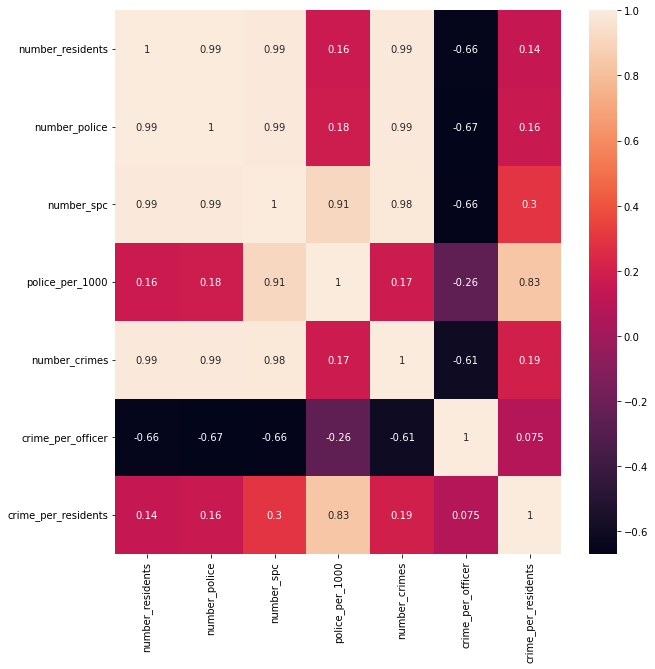

In [9]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Correlation heatmap in seaborn 
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

In [10]:
#Export viz
corr.figure.savefig(os.path.join(path, 'Analysis','Visualisations', 'correlation_heatmap.png'))

Number of police, residents and crimes are all 3 very highly correlated at 0.99. Meaning that more populus areas experience more crime and have more police officers available.
Crimes per officer on the other hand is negatively correlated with the above number variables. Which shows that the higher the number in an area the less crimes per office are recorded. It is interesting to see that the same goes for crime although this could be explained by the fact that crime and officers are positively correlated themselves.
Both crime per residents and police per residents show comparatively low correlation with all the other variables.

# 03. Scatterplot

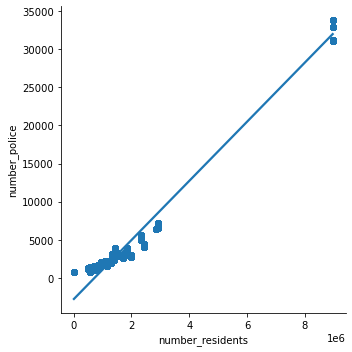

In [11]:
#Scatterplot for the "number_residents" and "number_police" 
scatter1 = sns.lmplot(x = 'number_residents', y = 'number_police', data = crime_police)

In [12]:
#Export viz
scatter1.figure.savefig(os.path.join(path, 'Analysis','Visualisations', 'scatter_pop_police.png'))

The strong upward trend is because of the large population of London and the size of the Met, which distorts the relationship significantly. There is an overall positive relationship between the 2 variables, but when looking England and Wales excluding London this rate would be lower. 
The overall relationship also looks more to be exponential, rather than linear.

In [13]:
#Subset without London and the Met
df_subset =  crime_police[crime_police['crime_area']!=22]

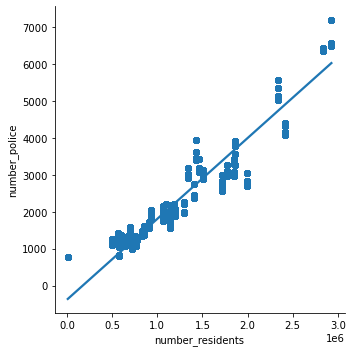

In [14]:
#Scatterplot without London and the Met
scatter2 = sns.lmplot(x = 'number_residents', y = 'number_police', data = df_subset)

In [15]:
#Export viz
scatter2.figure.savefig(os.path.join(path, 'Analysis','Visualisations', 'scatter_no_london.png'))

Looking at the relationship without London shows, that it is still highly correlated and that it does not fully follow a linear path. Despite the outlier the overall relationship is not being distorted by it.

# 04. Pair plots

In [7]:
#Creating a subset excluding id, longitude & latitude
sub_pair = crime_police[['crime_area','year', 'month','number_residents', 'number_police', 'number_spc', 'number_crimes', 'crime_type', 'outcome_cat','police_per_1000', 'crime_per_officer', 'crime_per_residents']]

In [8]:
sub_pair.index.is_unique

False

In [9]:
sub_pair = sub_pair.loc[~sub_pair.index.duplicated(), :]

In [10]:
sub_pair.index.is_unique

True

In [11]:
sub_pair.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10469121 entries, 0 to 10469120
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   crime_area           int8   
 1   year                 int16  
 2   month                int8   
 3   number_residents     float32
 4   number_police        float16
 5   number_spc           float16
 6   number_crimes        int32  
 7   crime_type           int8   
 8   outcome_cat          float16
 9   police_per_1000      float16
 10  crime_per_officer    float32
 11  crime_per_residents  float32
dtypes: float16(4), float32(3), int16(1), int32(1), int8(3)
memory usage: 627.4 MB


In [12]:
del crime_police

MemoryError: Unable to allocate 160. MiB for an array with shape (10469121, 2) and data type float64

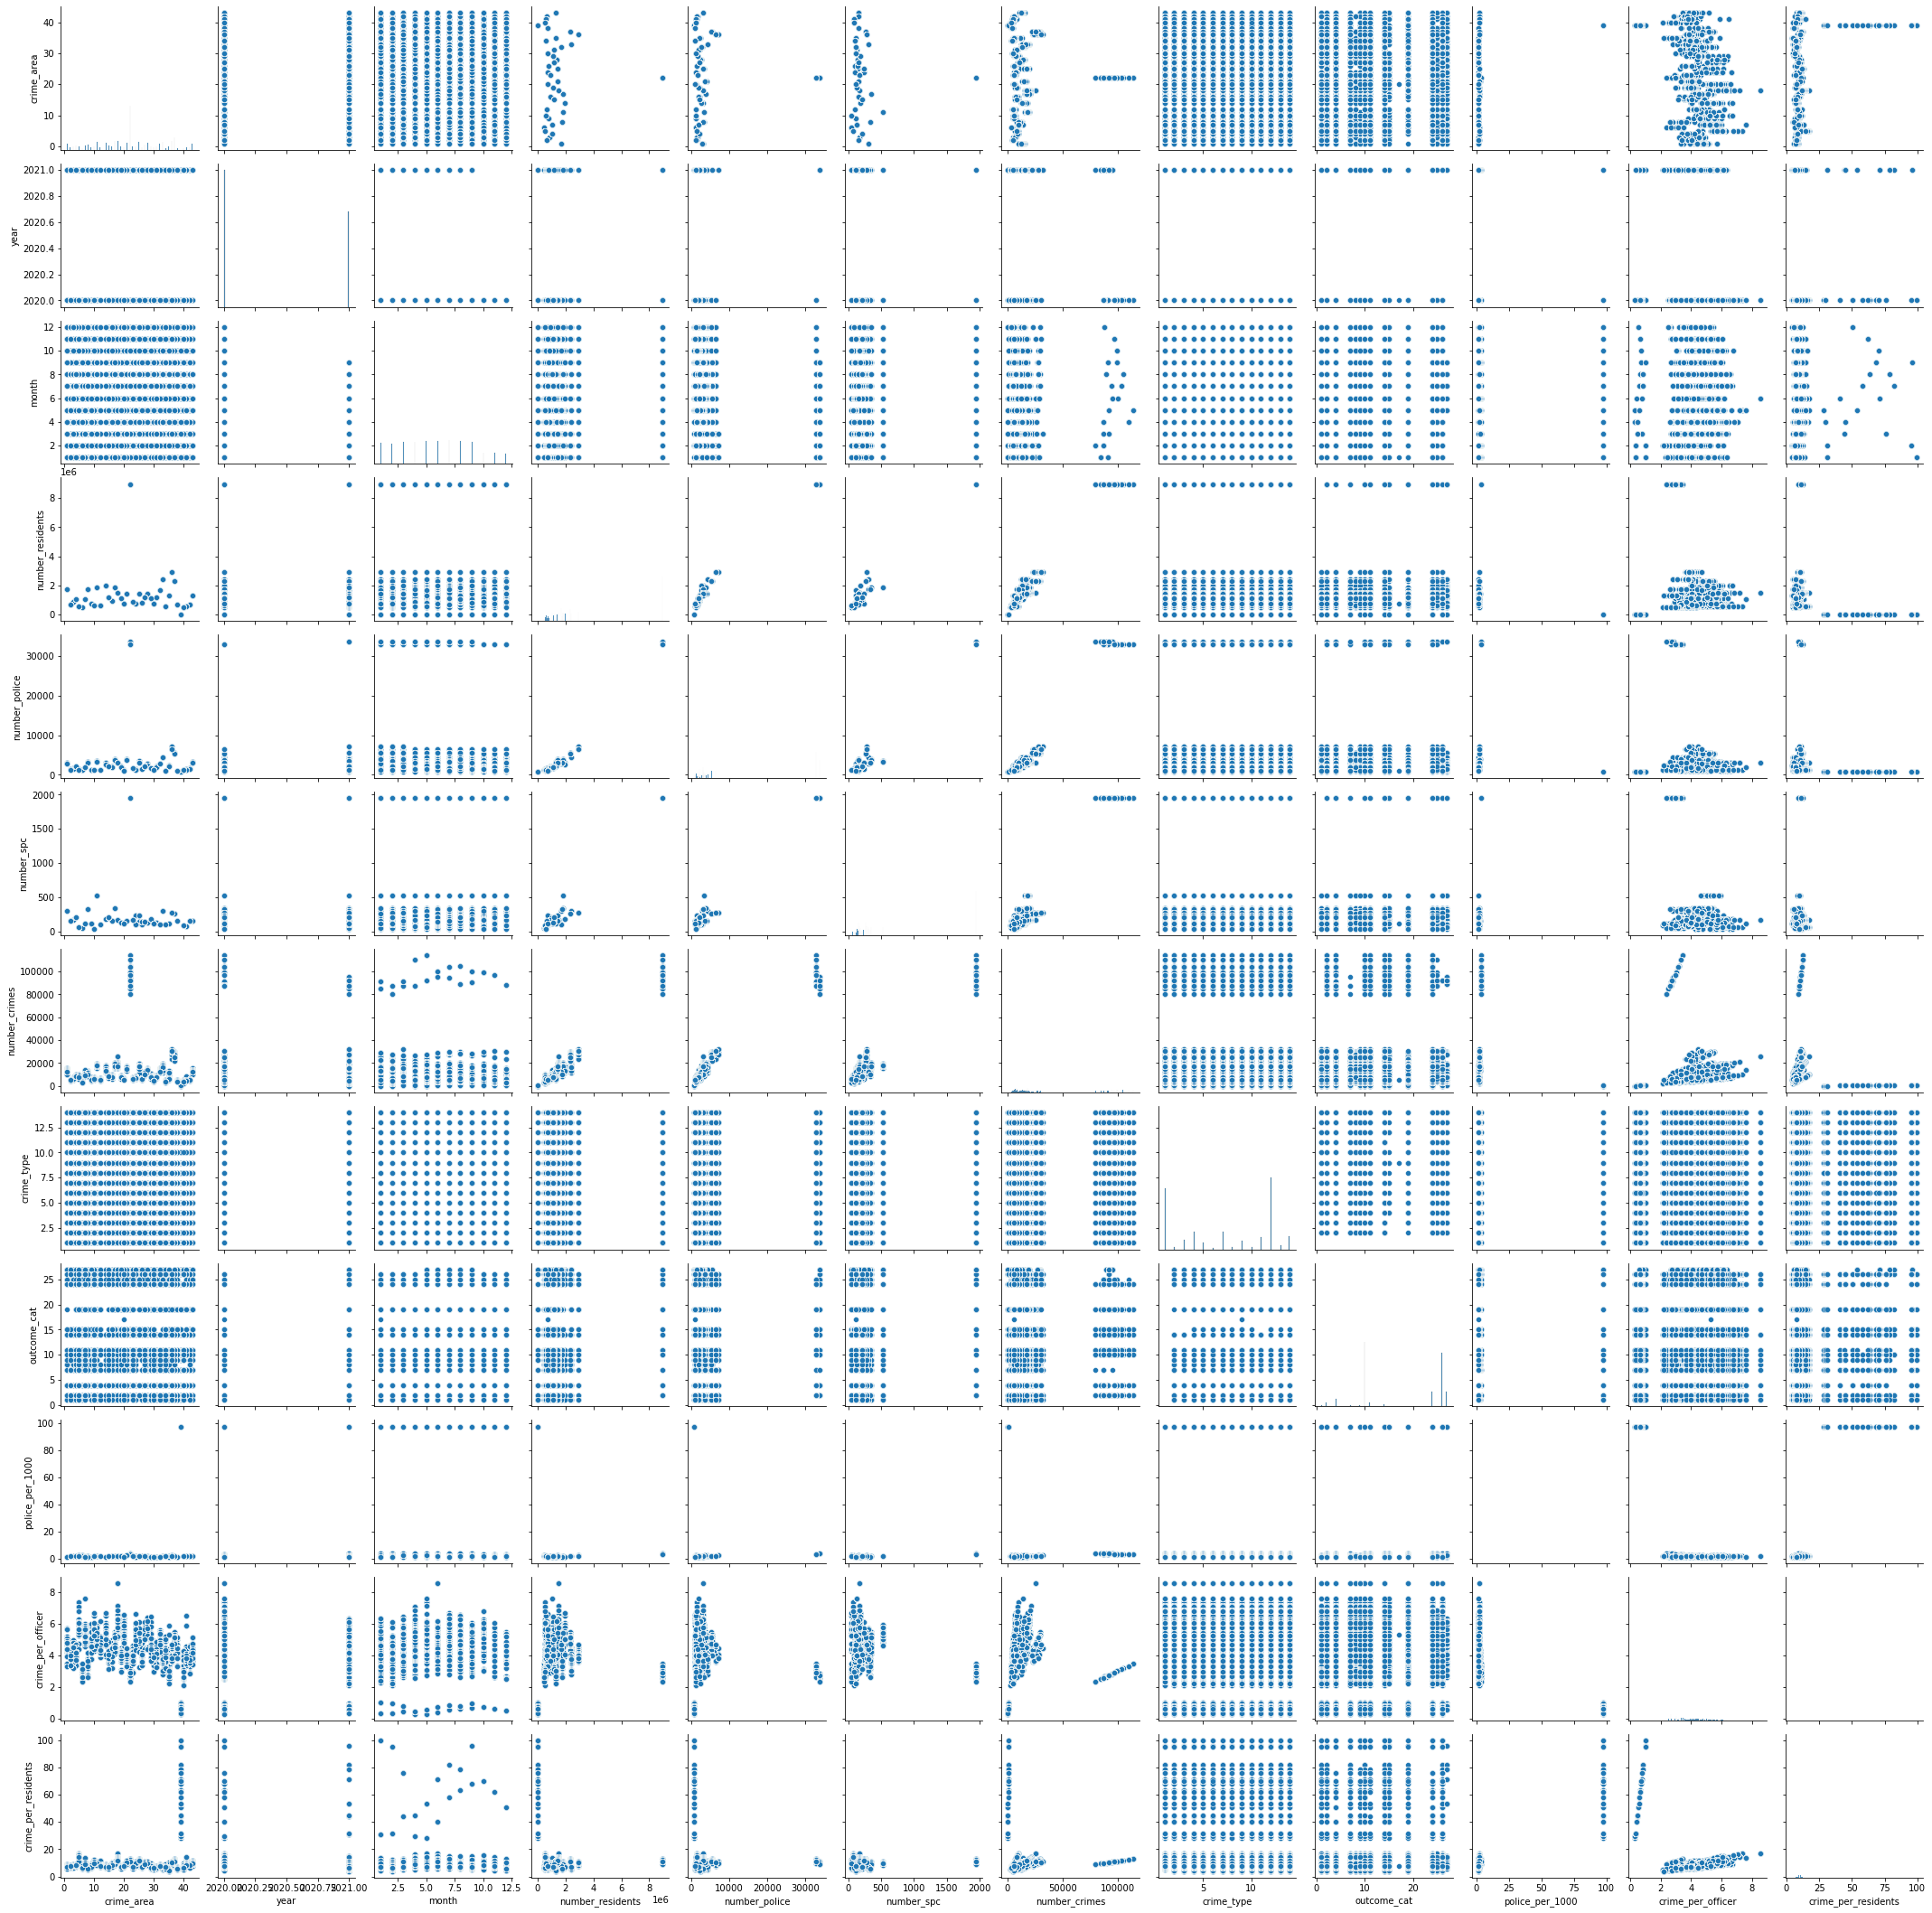

In [13]:
# Create a pair plot 
g = sns.pairplot(sub_pair)

London and the Met contiue to be outliers due to their size when plotting their numbers against any of the other variables. And their strong positive relationship between the 4 numbers variables (number_residents, number_police, number_crime, number_spc) shows in their scatterplots, even without the strong skew of London as outlier.
The different types of crime seem to be very evenly distributed across the board (discounting outliers).
crime_per_officer has an interesting distribution when plotted against crime_area, which could be interesting to investigate further. The positive correlation of this variables and crime_per_resident against number_crimes also looks interesting, especially since their relationship with number_police and number_residents is rather flat in comparison.

In [ ]:
del sub_pair

# 05. Categorical plot

In [ ]:
#Re-Import full data
crime_police = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'crime_police_cleaned.pkl'))

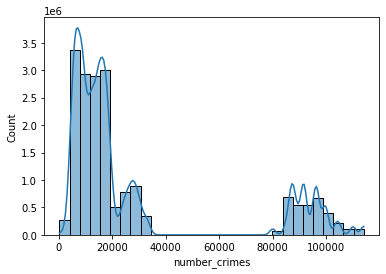

In [16]:
#Histogram 
hist=sns.histplot(crime_police['number_crimes'], bins = 30, kde = True)

In [17]:
#Export viz
hist.figure.savefig(os.path.join(path, 'Analysis','Visualisations', 'hist_crimes.png'))

In [18]:
#Grouping similar crime types
crime_police.loc[crime_police['crime_type'] == 2, 'crime'] = 'Theft'

In [19]:
crime_police.loc[crime_police['crime_type'] == 3, 'crime'] = 'Theft'

In [20]:
crime_police.loc[crime_police['crime_type'] == 7, 'crime'] = 'Theft'

In [21]:
crime_police.loc[(crime_police['crime_type'] >= 10) & (crime_police['crime_type']<=13), 'crime'] = 'Theft'

In [22]:
crime_police.loc[crime_police['crime_type'] == 5, 'crime'] = 'Weapons & Drugs'

In [23]:
crime_police.loc[crime_police['crime_type'] == 8, 'crime'] = 'Weapons & Drugs'

In [24]:
crime_police.loc[crime_police['crime_type'] == 1, 'crime'] = 'Public order'

In [25]:
crime_police.loc[crime_police['crime_type'] == 9, 'crime'] = 'Public order'

In [26]:
crime_police.loc[crime_police['crime_type'] == 4, 'crime'] = 'Violence & damage'

In [27]:
crime_police.loc[crime_police['crime_type'] == 14, 'crime'] = 'Violence & damage'

In [28]:
crime_police.loc[crime_police['crime_type'] == 6, 'crime'] = 'other'

In [29]:
crime_police['crime'].value_counts(dropna=False)

Theft                9635273
Public order         5189698
Violence & damage    2693553
Weapons & Drugs       720008
other                 123996
Name: crime, dtype: int64

In [ ]:
#Create categories for number_crime based on the distribution
#crime_police.loc[crime_police['number_crimes'] == 2, 'crime_range'] = 'High crime range'

In [30]:
#crime_police.loc[(crime_police['number_crimes'] < 80000) & (crime_police['number_crimes'] > 40000), 'crime_range'] = 'Mid crime range' 

In [31]:
#crime_police.loc[crime_police['number_crimes'] <= 40000, 'crime_range'] = 'Low crime range'

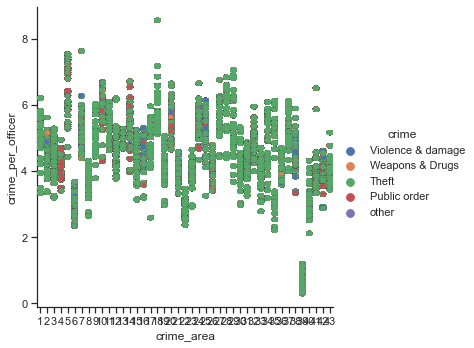

In [30]:
# Create a categorical plot in seaborn 
sns.set(style="ticks")
g = sns.catplot(x="crime_area", y="crime_per_officer", hue="crime", data=crime_police)

In [31]:
#Export viz
g.figure.savefig(os.path.join(path, 'Analysis','Visualisations', 'catplot_area_officer.png'))

The rate of crimes per officer in any given month varies within the constabulary. It would be interesting to see if the lower rate was due to covid lockdowns, which might have lead to a reduction in street crime. 
Overall all types of theft are the crimes reported most. With some areas also seeing a lot of Public Order offences reported, whereas others have more of a general mix. A higher share of public order offences could be an indicator of a more rural area, whereas urban centres are likely to experience more of a mix in the types of crimes reported.

# 06. Answers

1 What is the relationship between the size of the population and the number of officers in a constabulary?
-> These 2 variables have a strong positive relationship.

3 Are certain types of crime more prevalent in specific regions? -> There are definitely some areas with a higher share of certain types of crimes, but no clear statement can be made for regionality yet.

5 What is the relationship between the number of officeres and the number of crimes?
-> These 2 variables also have a strong positive correlation.

# 07. More questions

1 Why does a rising number of crimes increase the rate of crimes_per_officer and crimes_per_resident, but rising numbers of police and residents do not lead to a decrease in these variables?

2 Do rural areas have fewer crimes reported than urban centres?

# 08. Hypothesis

1 Rural areas have a higher share of public order offences than urban centres.

# 09. Export data

In [32]:
# Export data to pkl
crime_police.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'crime_police_cleaned2.pkl'))